In [1]:
# Week 2 - Energy Prediction: Model Training and Accuracy

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Upload your cleaned Week1 CSV file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("energydata_complete_cleaned.csv")
df.head()


Saving energydata_complete_cleaned.csv to energydata_complete_cleaned.csv


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [3]:
# Drop non-numeric and target columns
X = df.drop(columns=['date', 'Appliances', 'lights'])
y = df[['Appliances', 'lights']]  # multi-output target

print("Shape of features:", X.shape)
print("Shape of targets:", y.shape)


Shape of features: (19735, 26)
Shape of targets: (19735, 2)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (15788, 26) Test: (3947, 26)


In [5]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [7]:
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred, multioutput='uniform_average')
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"----- {name} -----")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}\n")
    return r2

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


----- Linear Regression -----
R² Score: 0.1797
MAE: 29.1714
RMSE: 65.5576

----- Random Forest Regressor -----
R² Score: 0.6419
MAE: 16.5031
RMSE: 45.2800



0.6419177721453431

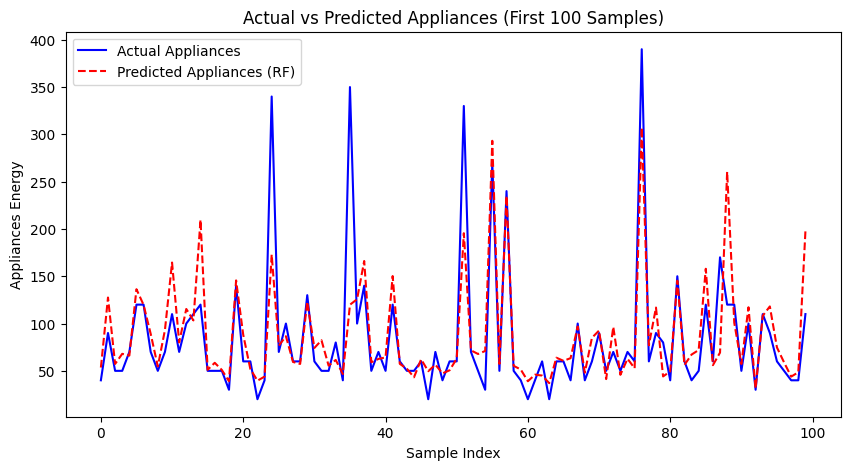

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y_test['Appliances'].values[:100], label='Actual Appliances', color='blue')
plt.plot(y_pred_rf[:100, 0], label='Predicted Appliances (RF)', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Appliances Energy')
plt.title('Actual vs Predicted Appliances (First 100 Samples)')
plt.legend()
plt.show()


In [9]:
# Random Forest performed better typically
joblib.dump(rf_model, "rf_energy_model.joblib")
files.download("rf_energy_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>